# Data Analysis, Visualization and Interpretation
Author: Smridhi Mangla

In [10]:
#load file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#load real estate sales dataset
df_real_estate_sales = pd.read_csv("/content/drive/My Drive/Data Science with Python Spring2020/week1_22jan2020/assignment1/Real_Estate_Sales_2014-2016.csv")

In [13]:
## Summarize Data

# Descriptive statistics
# shape
print(df_real_estate_sales.shape)
# types
print(df_real_estate_sales.dtypes)
# head
print(df_real_estate_sales.head(20))

(145987, 11)
ID                   int64
SerialNumber         int64
ListYear             int64
DateRecorded        object
Town                object
Address             object
AssessedValue        int64
SaleAmount         float64
SalesRatio         float64
PropertyType        object
ResidentialType     object
dtype: object
    ID  SerialNumber  ListYear  ... SalesRatio PropertyType ResidentialType
0    1         14046      2014  ...   0.142933  Vacant Land             NaN
1    2         14011      2014  ...   0.805789  Residential   Single Family
2    3         15006      2015  ...   2.058000  Residential   Single Family
3    4         14044      2014  ...   0.846784  Residential   Single Family
4    5         14035      2014  ...   0.713043  Residential   Single Family
5    6         15051      2015  ...   0.833628  Residential   Single Family
6    7         14002      2014  ...   1.862500  Residential   Single Family
7    8         15011      2015  ...   0.640433  Residential   Single

In [0]:
#load list of towns dataset
df_list_of_towns = pd.read_csv("/content/drive/My Drive/Data Science with Python Spring2020/week1_22jan2020/assignment1/List_of_Towns.csv")

In [15]:
## Summarize Data

# Descriptive statistics
# shape
print(df_list_of_towns.shape)
# types
print(df_list_of_towns.dtypes)
# head
print(df_list_of_towns.head(20))

(169, 7)
Number                        int64
Town                         object
Designation                  object
Established Year              int64
Land area (square miles)    float64
Population (in 2010)         object
County                       object
dtype: object
    Number          Town  ... Population (in 2010)             County
0        1       Andover  ...                3,303     Tolland County
1        2       Ansonia  ...               19,249   New Haven County
2        3       Ashford  ...                4,100     Windham County
3        4          Avon  ...               18,098    Hartford County
4        5   Barkhamsted  ...                3,620  Litchfield County
5        6  Beacon Falls  ...                6,049   New Haven County
6        7        Berlin  ...               19,866    Hartford County
7        8       Bethany  ...                5,563   New Haven County
8        9        Bethel  ...               18,584   Fairfield County
9       10     Bethlehem 

In [0]:
# merge List of Towns file and Real Estate Sales file
df_result = pd.merge(df_real_estate_sales,
                    df_list_of_towns,
                    on='Town')

In [17]:
#find missing values
missing_values = df_result.isnull().sum(axis=0)
missing_values

ID                              0
SerialNumber                    0
ListYear                        0
DateRecorded                    6
Town                            0
Address                         2
AssessedValue                   0
SaleAmount                   5283
SalesRatio                      0
PropertyType                    0
ResidentialType             11905
Number                          0
Designation                     0
Established Year                0
Land area (square miles)        0
Population (in 2010)            0
County                          0
dtype: int64

In [18]:
#Replacing missing date recorded data with the corresponding year in ListYear column.
#df_result['DateRecorded'] = df_result['DateRecorded'].astype(str)
df_result['DateRecorded'].fillna('1/1/2014', inplace = True)
missing_values = df_result.isnull().sum(axis=0)
missing_values

ID                              0
SerialNumber                    0
ListYear                        0
DateRecorded                    0
Town                            0
Address                         2
AssessedValue                   0
SaleAmount                   5283
SalesRatio                      0
PropertyType                    0
ResidentialType             11905
Number                          0
Designation                     0
Established Year                0
Land area (square miles)        0
Population (in 2010)            0
County                          0
dtype: int64

In [19]:
#Replacing missing Sales Amount data with the corresponding assessed value column
df_result['SaleAmount'].fillna(df_result['AssessedValue'], inplace = True)
missing_values = df_result.isnull().sum(axis=0)
missing_values

ID                              0
SerialNumber                    0
ListYear                        0
DateRecorded                    0
Town                            0
Address                         2
AssessedValue                   0
SaleAmount                      0
SalesRatio                      0
PropertyType                    0
ResidentialType             11905
Number                          0
Designation                     0
Established Year                0
Land area (square miles)        0
Population (in 2010)            0
County                          0
dtype: int64

In [20]:
#Make a column “Property Value” 
#Binning AssessedValue given the conditions: 
#'LowRange' if Assessed Value <=300,000 
#'MidRange' if Assessed Value >300,000 and <=800,000 
#'HighRange' if Assessed Value >800,000
df_result['Property Value'] = pd.cut(df_result['AssessedValue'], bins=[-100000,300000,800000,1000000000], labels=['LowRange','MidRange','HighRange'])
df_result.groupby('Property Value').size()


Property Value
LowRange     120076
MidRange      19486
HighRange      6425
dtype: int64

In [21]:
#removing , from population
df_result['Population (in 2010)'] = df_result['Population (in 2010)'].str.replace(',','')
df_result['Population (in 2010)'] = df_result['Population (in 2010)'].astype(int)

#descriptive statistics
df_result.describe()

,ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio,Number,Established Year,Land area (square miles),Population (in 2010)
count,145987.000000,1.459870e+05,145987.000000,1.459870e+05,1.459870e+05,145987.000000,145987.000000,145987.000000,145987.000000,145987.000000
mean,72994.000000,2.645845e+05,2015.001438,3.105082e+05,4.119349e+05,2.437448,90.978786,1747.667573,28.606906,44023.432586
std,42142.961211,1.174402e+06,0.824892,1.546245e+06,3.376906e+06,51.834706,47.549466,78.490692,11.792604,36516.747704
min,1.000000,1.610000e+02,2014.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1633.000000,4.980000,854.000000
25%,36497.500000,1.401250e+05,2014.000000,1.038650e+05,1.289000e+05,0.619862,51.000000,1670.000000,18.850000,18062.000000
50%,72994.000000,1.501020e+05,2015.000000,1.547000e+05,2.150000e+05,0.709333,93.000000,1771.000000,28.060000,29257.000000
75%,109490.500000,1.601300e+05,2016.000000,2.434600e+05,3.500000e+05,0.884500,135.000000,1820.000000,37.750000,60477.000000
max,145987.000000,1.400028e+08,2016.000000,1.389588e+08,3.955000e+08,4516.083916,169.000000,1921.000000,61.590000,144229.000000


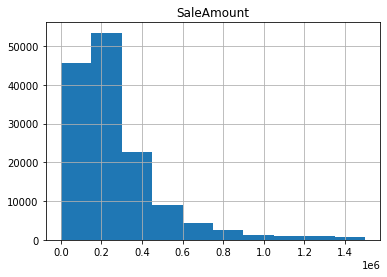

In [22]:
#Data visualization for Sales Amount using histogram
subData_SA = df_result[df_result['SaleAmount']<1500000]
subData_SA.hist('SaleAmount')
plt.show()

##########################################
#most of the sales are less 1500000

Text(0, 0.5, 'Sale Amount')

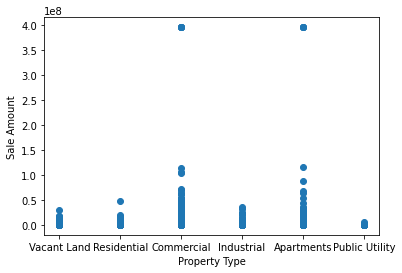

In [23]:
#Data visualization for Property Type and Sale Amount using scatter plot
plt.scatter(df_result.PropertyType,df_result.SaleAmount) 
plt.xlabel('Property Type')
plt.ylabel('Sale Amount')

###################################################
# We can observe huge variation in the prices for ‘Commercial’ and ‘Apartments’ property type 

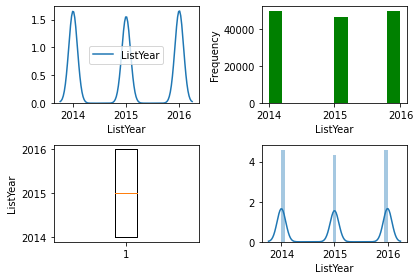

In [24]:
#Data visualization for list year using box plot, histogram, density plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#2 rows and 2columns
fig, ax = plt.subplots(2,2)

#density plot for ListYear
sns.kdeplot(df_result.ListYear,
            ax=ax[0,0]) 
ax[0,0].set_xlabel('ListYear')

#histogram for ListYear
ax[0,1].hist(df_result.ListYear, color='green')
ax[0,1].set_xlabel('ListYear')
ax[0,1].set_ylabel('Frequency')

#boxplot for ListYear
ax[1,0].boxplot(df_result.ListYear) 
ax[1,0].set_ylabel('ListYear')

#overlapping density plot and histogram for ListYear
sns.distplot(df_result.ListYear,ax=ax[1,1]) 

fig.tight_layout()
plt.show()

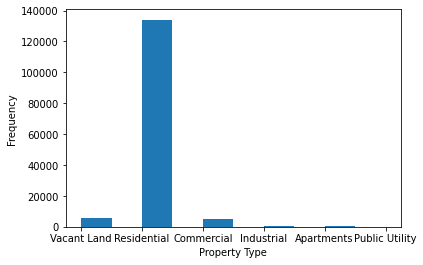

In [25]:
#Data visualization for Property Type using Bar Graph 
plt.hist(df_result.PropertyType)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Stacked Histogram with Multiple Counties')

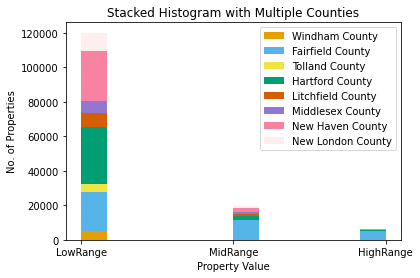

In [26]:
# Data visualization for County using histogram
x1 = list(df_result[df_result['County'] == 'Windham County']['Property Value']) 
x2 = list(df_result[df_result['County'] == 'Fairfield County']['Property Value']) 
x3 = list(df_result[df_result['County'] == 'Tolland County']['Property Value']) 
x4 = list(df_result[df_result['County'] == 'Hartford County']['Property Value']) 
x5 = list(df_result[df_result['County'] == 'Litchfield County']['Property Value']) 
x6 = list(df_result[df_result['County'] == 'Middlesex County']['Property Value']) 
x7 = list(df_result[df_result['County'] == 'New Haven County']['Property Value']) 
x8 = list(df_result[df_result['County'] == 'New London County']['Property Value']) 

#assigning colours and names 
colors = ['#E69F00', '#56B4E9', '#F0E442','#009E73', '#D55E00', '#9177D2', '#F882A1', '#FFEEEE'] 
#Text(0, 0.5, 'Frequency') 
names = ['Windham County','Fairfield County','Tolland County','Hartford County','Litchfield County','Middlesex County','New Haven County','New London County'] 

#plotting stacked histogram 
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8], bins = int(180/15), stacked=True, color=colors,label=names)
plt.legend() 
plt.xlabel('Property Value') 
plt.ylabel('No. of Properties') 
plt.title('Stacked Histogram with Multiple Counties') 

##########################################################################
#Fairfield has the maximum number of High range properties. Owning properties in the Fairfield county is most profitable as they have the highest average AssessedValue.  
#New Haven County has maximum Low range properties 

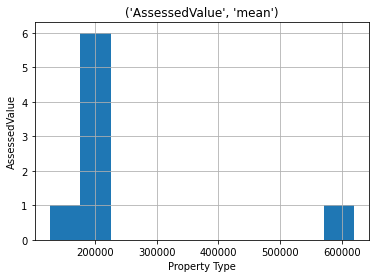

In [27]:
#Frequency table based on the average Assessed value of properties in each County
subdataAV = df_result.groupby('County').agg({'AssessedValue': ['mean']})

#Data visualization for Assessed value of County using histogram
subdataAV.hist()
plt.xlabel('Property Type')
plt.ylabel('AssessedValue')
plt.show()

###############################################################
# Owning properties in the Fairfield county is most profitable as they have the highest average AssessedValue. 

In [29]:
df_result.dtypes

ID                             int64
SerialNumber                   int64
ListYear                       int64
DateRecorded                  object
Town                          object
Address                       object
AssessedValue                  int64
SaleAmount                   float64
SalesRatio                   float64
PropertyType                  object
ResidentialType               object
Number                         int64
Designation                   object
Established Year               int64
Land area (square miles)     float64
Population (in 2010)           int64
County                        object
Property Value              category
dtype: object

In [30]:
#Frequency table based on the count of properties sold in each year.
df_result.groupby('ListYear').size()

#################################
#Among 2014, 2015, 2016- 2016 has highest sales

ListYear
2014    49563
2015    46651
2016    49773
dtype: int64

In [31]:
#Frequency table based on the average sale amount and land area of properties in each property type
subdataRT = df_result.groupby('PropertyType').agg({'SaleAmount': ['mean'],'Land area (square miles)': ['mean']})
subdataRT

###############################################################
#Average sales amount for apartments was highest
#Public Utility covers minimum land area

,SaleAmount,Land area (square miles)
,mean,mean
PropertyType,,
Apartments,3.904337e+06,24.627549
Commercial,1.898054e+06,27.566583
Industrial,1.445131e+06,28.319151
Public Utility,7.433107e+05,22.816923
Residential,3.372912e+05,28.550319
Vacant Land,2.233891e+05,31.640937


In [32]:
# multidimensional frequency table using the dataset based on Town, County and list year.
freq_table = pd.DataFrame(pd.crosstab([df_result.County, df_result.Town],
                   df_result.ListYear, margins=True))
freq_table

ListYear                      2014   2015   2016     All
County           Town                                   
Fairfield County Bethel        356    370    352    1078
                 Bridgeport   1741      0   1953    3694
                 Brookfield    338    346      0     684
                 Danbury      1013   1127   1156    3296
                 Darien        453    345    408    1206
...                            ...    ...    ...     ...
Windham County   Sterling       63     82     88     233
                 Thompson        0    216    227     443
                 Windham       277    317    335     929
                 Woodstock     156    197      0     353
All                          49563  46651  49773  145987

[170 rows x 4 columns]

In [33]:
#‘Property value’ based on the percentages of the row and an overall total of properties in each range.
freq_table_prop_value = pd.crosstab(index=df_result['Property Value'],
            columns="Number", margins=True, margins_name='Total')
freq_table_prop_value

freq_table_prop_value.columns=['Count','Total']
freq_table_prop_value.index=['LowRange','MidRange','HighRange','ColumnTotal']
freq_table_prop_value

freq_table_prop_value = (freq_table_prop_value/freq_table_prop_value.loc['ColumnTotal','Total'])*100
freq_table_prop_value

###################################################################
#Low range properties constitute 82.25% of total properties sold

,Count,Total
LowRange,82.251159,82.251159
MidRange,13.347764,13.347764
HighRange,4.401077,4.401077
ColumnTotal,100.000000,100.000000
